In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from TOV_Solver import evaluate_and_predict
from preprocessing import tov_load_and_preprocess
import joblib

In [3]:
tov_solver = load_model('models/tov_solver.h5', compile=False)
tov_solver.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [4]:
X_test = np.load('dataframes/X_test.npy')
tov_solver.predict(X_test[0].reshape(1, -1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


array([[[0.01738573, 0.5421618 ],
        [0.04118637, 0.23130071],
        [0.07164019, 0.16757938],
        [0.10371864, 0.14001913],
        [0.13635413, 0.12444947],
        [0.16458449, 0.1160558 ],
        [0.19047911, 0.1109997 ],
        [0.2269496 , 0.10731127],
        [0.2658155 , 0.10494011],
        [0.2963984 , 0.10532658],
        [0.33385938, 0.10576129],
        [0.37187445, 0.10666268],
        [0.41657743, 0.10655497],
        [0.4483429 , 0.10812385],
        [0.48732102, 0.10864407],
        [0.5301679 , 0.10906639],
        [0.5793209 , 0.10681552],
        [0.60308415, 0.10671735],
        [0.6429739 , 0.10567998],
        [0.67147547, 0.10420858],
        [0.7128307 , 0.1015835 ],
        [0.73351   , 0.09973905],
        [0.7635955 , 0.09728596],
        [0.7891654 , 0.09477518],
        [0.81919354, 0.0934085 ],
        [0.82975256, 0.08841291],
        [0.85050505, 0.08315796],
        [0.86589473, 0.07545383],
        [0.876782  , 0.06353972],
        [0.887

In [5]:
tov_solver.predict(X_test[1].reshape(1, -1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[[0.02492126, 0.3073263 ],
        [0.05219226, 0.19410075],
        [0.08540993, 0.1525543 ],
        [0.11676247, 0.13300218],
        [0.14709766, 0.12094133],
        [0.17698015, 0.11405013],
        [0.20588674, 0.10955443],
        [0.24523386, 0.106163  ],
        [0.26953563, 0.10580777],
        [0.30653045, 0.10583333],
        [0.34522495, 0.10628579],
        [0.39039233, 0.10674219],
        [0.42829543, 0.10706384],
        [0.46766654, 0.10816714],
        [0.5076259 , 0.10860357],
        [0.5587263 , 0.10864791],
        [0.58886576, 0.10554855],
        [0.6233092 , 0.10614794],
        [0.6673875 , 0.10469904],
        [0.7094577 , 0.1024501 ],
        [0.737805  , 0.10054909],
        [0.767492  , 0.09835747],
        [0.79748183, 0.09569734],
        [0.82751137, 0.09282387],
        [0.84481555, 0.09113392],
        [0.8629839 , 0.08513792],
        [0.8828462 , 0.07911506],
        [0.8999121 , 0.07126327],
        [0.90757763, 0.05824918],
        [0.918

In [6]:
test_metrics, y_pred = evaluate_and_predict(tov_solver, np.load('dataframes/X_test.npy'), np.load('dataframes/y_test.npy'), joblib.load('scalers/mr_scaler.pkl'))

1/1 - 1s - 580ms/step - loss: 3.3626e-04 - mae: 0.0109
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


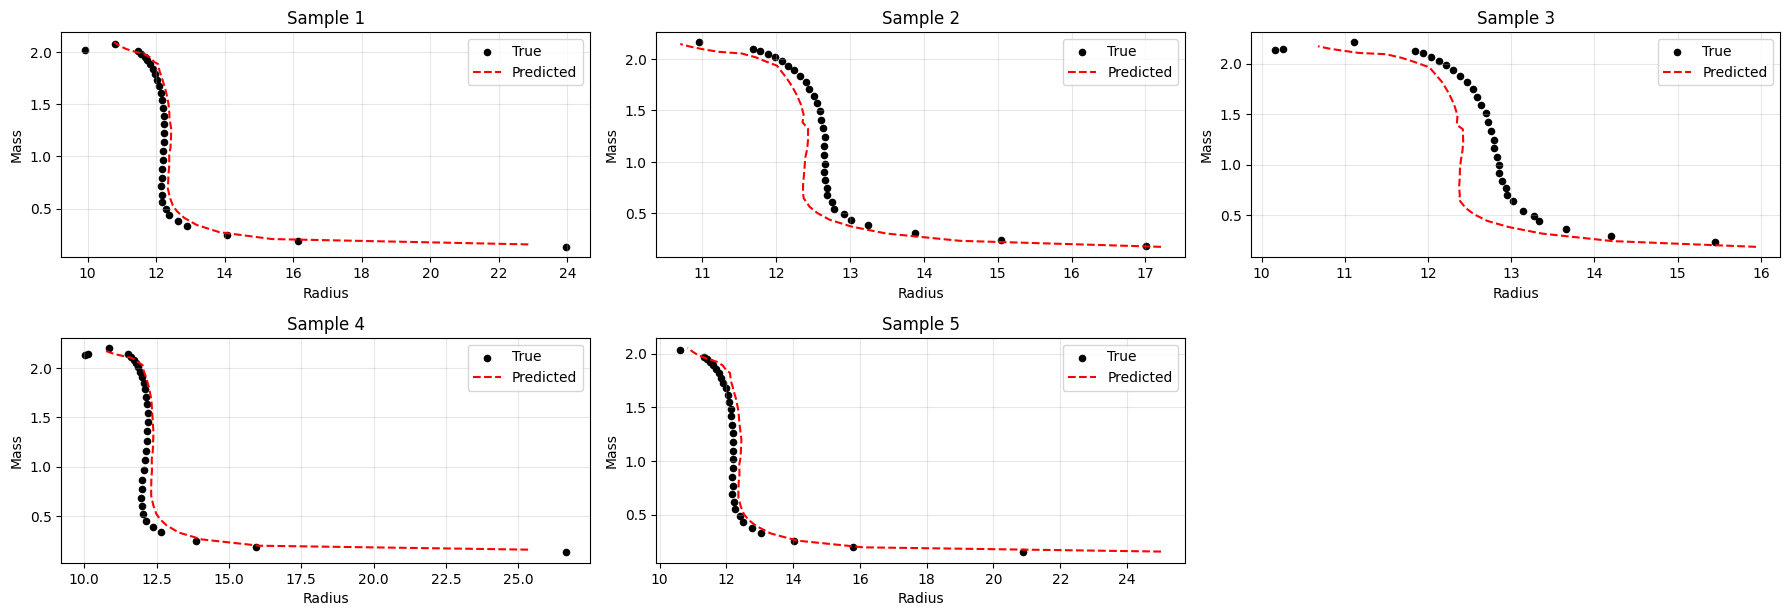

In [7]:
fig, axes = plt.subplots(5, 3, figsize=(18, 15))
axes = axes.flatten()
mr_scaler = joblib.load('scalers/mr_scaler.pkl')
y_pred = mr_scaler.inverse_transform(y_pred.reshape(-1, 2)).reshape(y_pred.shape)
for sample_idx in range(5):
    # True M-R relation (black line)
    radius_true = np.load('dataframes/y_test.npy')[sample_idx, :, 1]  # Radius is target 1 (x-axis)
    mass_true = np.load('dataframes/y_test.npy')[sample_idx, :, 0]    # Mass is target 0 (y-axis)


    mr_true_sample = np.column_stack((mass_true, radius_true))
    mr_true_unscaled = mr_scaler.inverse_transform(mr_true_sample)
    axes[sample_idx].scatter(mr_true_unscaled[:,1], mr_true_unscaled[:,0], color='black', s=20, label='True')
    
    # Predicted M-R relation (red scatter points)
    radius_pred = y_pred[sample_idx, :, 1]  # Radius is target 1 (x-axis)
    mass_pred = y_pred[sample_idx, :, 0]    # Mass is target 0 (y-axis)

    axes[sample_idx].plot(radius_pred, mass_pred, "--" ,color='red', label='Predicted')
    
    axes[sample_idx].set_title(f'Sample {sample_idx + 1}')
    axes[sample_idx].set_xlabel('Radius')
    axes[sample_idx].set_ylabel('Mass')
    axes[sample_idx].legend()
    axes[sample_idx].grid(True, alpha=0.3)

for i in range(5, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()